<a href="https://colab.research.google.com/github/muttakinsiam/finalProject/blob/main/Phising_Site_Classifier_Using_DT%2CRF_%26_SVM_from_Lexical_Analysis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


[Dataset of Lexical Analysis](https://drive.google.com/file/d/1oIEvLcap5VlVlVpm1NeyFn8MzpEC3r5Z/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print(os.getcwd())  # Print current working directory

#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/FinalDataset/All_Infogain.csv')
data0.head()

Mounted at /content/drive
/content


,avgpathtokenlen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,CharacterContinuityRate,NumberRate_URL,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,105.0,0.876,0.008,0.087,0.095,9.174,0.010,0.435,0.199,0.219,-1.0,0.904,phishing
1,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.257,0.293,-1.0,0.870,phishing
2,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.000,0.000,-1.0,0.870,phishing
3,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.000,0.000,-1.0,0.870,phishing
4,65.0,0.948,0.006,0.182,0.032,30.000,0.006,0.727,0.141,0.141,-1.0,1.000,benign


In [ ]:
#Checking the shape of the dataset
data0.shape

(36417, 13)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['avgpathtokenlen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio',
       'domainUrlRatio', 'pathDomainRatio', 'argPathRatio',
       'CharacterContinuityRate', 'NumberRate_URL', 'NumberRate_FileName',
       'NumberRate_AfterPath', 'Entropy_Domain', 'class'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36417 entries, 0 to 36416
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgpathtokenlen          36417 non-null  float64
 1   pathurlRatio             36417 non-null  float64
 2   ArgUrlRatio              36417 non-null  float64
 3   argDomanRatio            36417 non-null  float64
 4   domainUrlRatio           36417 non-null  float64
 5   pathDomainRatio          36417 non-null  float64
 6   argPathRatio             36417 non-null  float64
 7   CharacterContinuityRate  36417 non-null  float64
 8   NumberRate_URL           36417 non-null  float64
 9   NumberRate_FileName      36417 non-null  float64
 10  NumberRate_AfterPath     36417 non-null  float64
 11  Entropy_Domain           36417 non-null  float64
 12  class                    36417 non-null  object 
dtypes: float64(12), object(1)
memory usage: 3.6+ MB


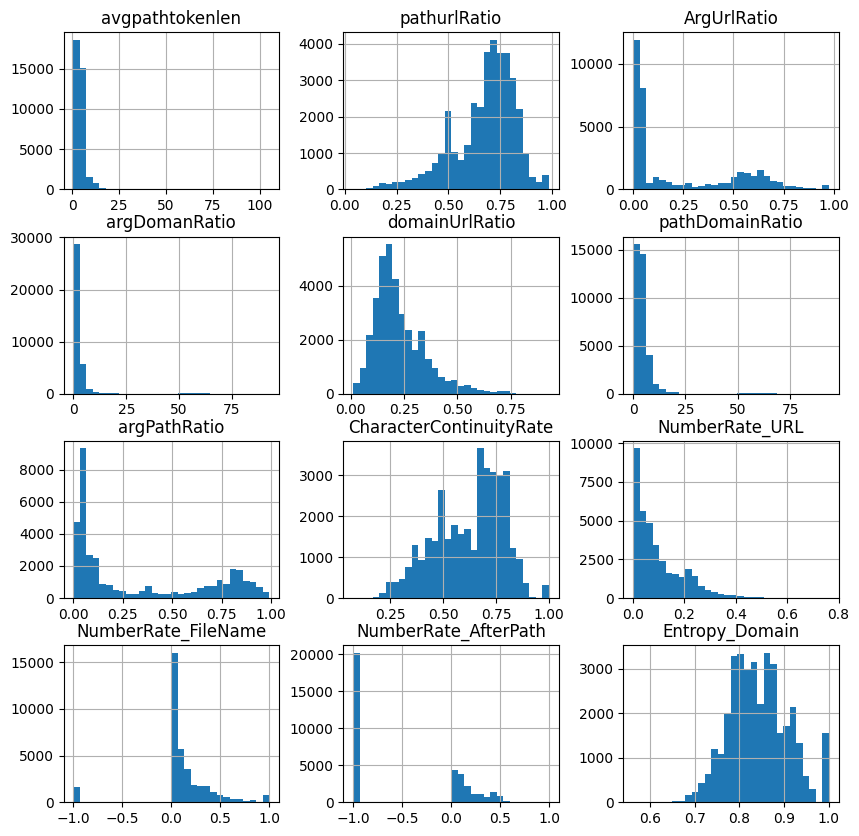

In [ ]:

#Plotting the data distribution
data0.hist(bins = 30,figsize = (10,10))
plt.show()


<ipython-input-5-e357298ee697>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


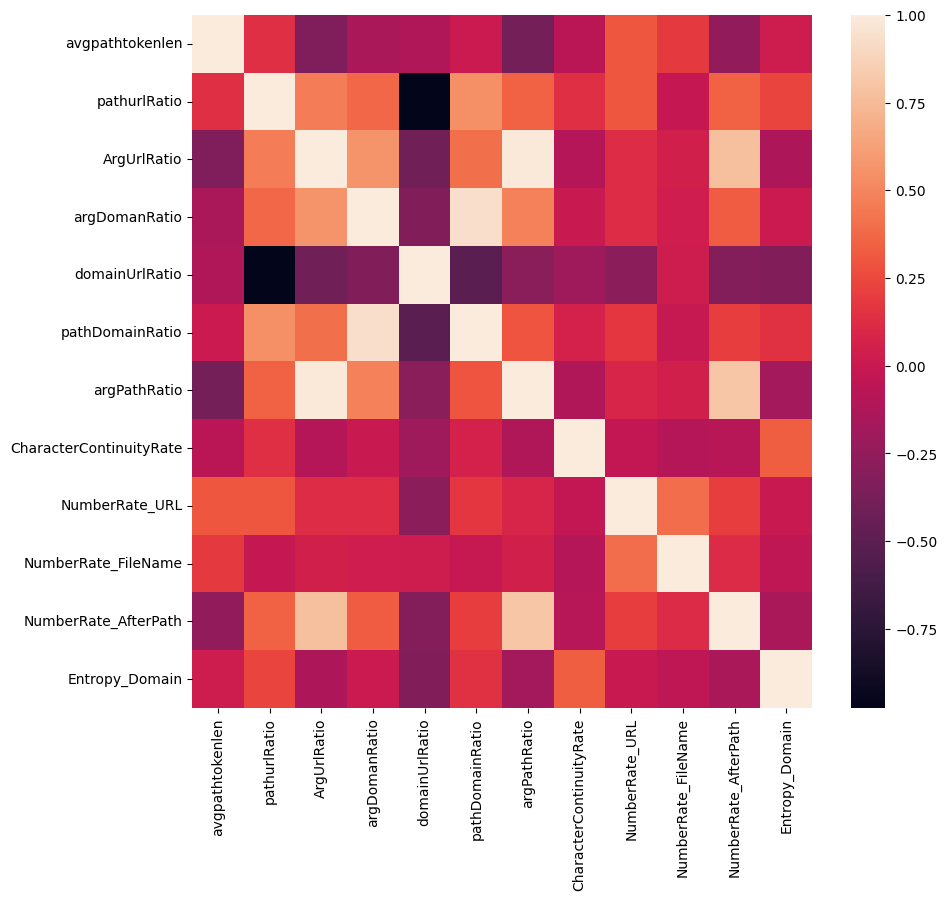

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10,9))
sns.heatmap(data0.corr())
plt.show()


In [ ]:
data0.describe()

,avgpathtokenlen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,CharacterContinuityRate,NumberRate_URL,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain
count,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000,36417.000000
mean,4.557593,0.674727,0.237958,2.176043,0.227918,4.705858,0.326423,0.624667,0.095932,0.111093,-0.471727,0.843047
std,2.838727,0.150243,0.272202,6.445867,0.120900,6.493607,0.338607,0.160571,0.095880,0.321863,0.600680,0.066120
min,0.667000,0.041000,0.000000,0.000000,0.011000,0.044000,0.000000,0.075000,0.000000,-1.000000,-1.000000,0.562000
25%,3.000000,0.604000,0.029000,0.125000,0.147000,2.095000,0.044000,0.500000,0.023000,0.000000,-1.000000,0.796000
50%,4.100000,0.705000,0.050000,0.200000,0.197000,3.571000,0.111000,0.667000,0.065000,0.070000,-1.000000,0.836000
75%,5.000000,0.778000,0.518000,2.667000,0.288000,5.286000,0.703000,0.750000,0.149000,0.214000,0.104000,0.885000
max,105.000000,0.985000,0.975000,92.533000,0.930000,93.467000,0.990000,1.000000,0.762000,1.000000,1.000000,1.000000


In [ ]:
data = data0
data.isnull().sum()


avgpathtokenlen            0
pathurlRatio               0
ArgUrlRatio                0
argDomanRatio              0
domainUrlRatio             0
pathDomainRatio            0
argPathRatio               0
CharacterContinuityRate    0
NumberRate_URL             0
NumberRate_FileName        0
NumberRate_AfterPath       0
Entropy_Domain             0
class                      0
dtype: int64

In [ ]:

# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data0.sample(frac=1).reset_index(drop=True)
data.head()

,avgpathtokenlen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,CharacterContinuityRate,NumberRate_URL,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,4.250,0.775,0.539,3.692,0.146,5.308,0.696,0.539,0.056,0.059,0.083,0.834,spam
1,4.833,0.597,0.035,0.125,0.281,2.125,0.059,0.375,0.070,0.000,-1.000,0.832,spam
2,6.500,0.718,0.019,0.091,0.214,3.364,0.027,0.682,0.165,0.044,-1.000,0.809,phishing
3,8.333,0.771,0.018,0.111,0.165,4.667,0.024,0.611,0.239,0.531,-1.000,0.820,phishing
4,4.333,0.883,0.790,10.385,0.076,11.615,0.894,0.769,0.152,0.173,0.193,0.860,malware


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['class']
X = data.drop('class', axis=1)

# Displaying the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (36417, 12)
Shape of y: (36417,)


In [ ]:

# Splitting the dataset into train and test sets: 60-40 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 12)
X_train.shape, X_test.shape

((21850, 12), (14567, 12))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


In [ ]:

# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 10)
# fit the model
tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10)

In [ ]:

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.897
Decision Tree: Accuracy on test Data: 0.876


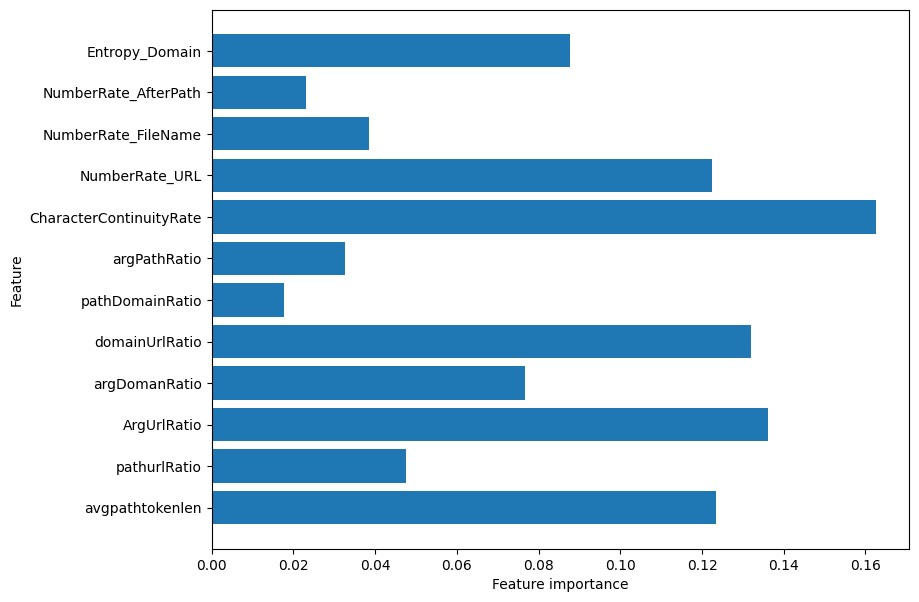

In [ ]:
#checking the feature importance in the model
#tree.feature_importances_ = a list of values indicating the importance of each feature in the model's predictions.
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:

#storing the results. The below mentioned order of parameter passing is important.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=10)

# fit the model
forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [ ]:

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)


In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.936
Random forest: Accuracy on test Data: 0.916


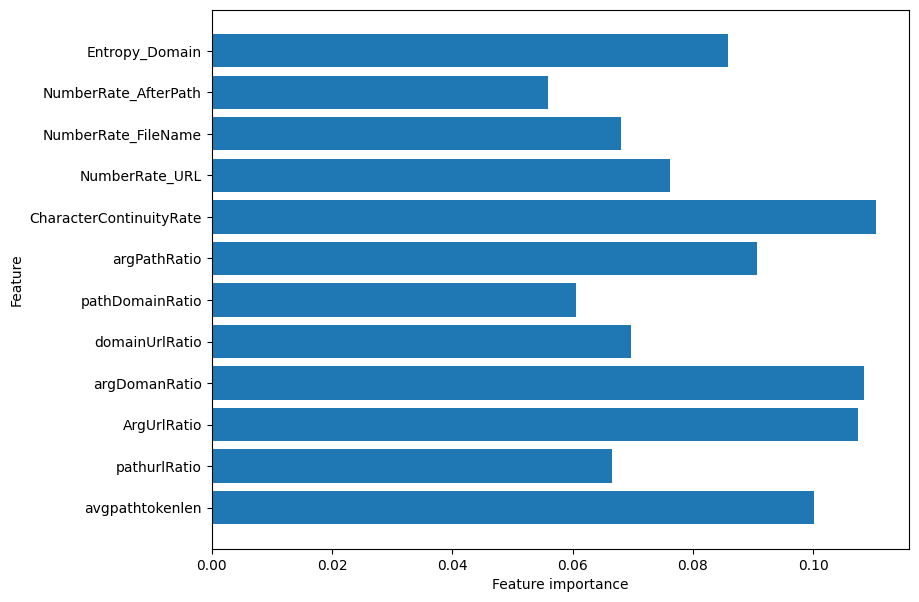

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:

here we hypertuned

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=42)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.621
SVM : Accuracy on test Data: 0.614


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [ ]:

#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.897,0.876
1,Random Forest,0.936,0.916
2,SVM,0.621,0.614
